<a href="https://colab.research.google.com/github/JeonJongDae/dinner_stock_AI/blob/main/6%EC%A3%BC%EC%B0%A8/bike_sharing_demand_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand

- [데이터 설명](https://www.kaggle.com/c/bike-sharing-demand)



## Step1. LinearRegressor

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

bike_df = pd.read_csv('https://raw.githubusercontent.com/zzhining/data_visualization/main/dataset/bike_sharing_demand_train.csv')
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Data Fields**

- datetime - 대여날짜 및 시간 
- season - 계절 (1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 ) 
- holiday - 휴일 
- workingday - 평일(주말과 휴일을 제외한 날) 
- weather - 날씨 
    * 1: 맑음, 대체로 흐림, 일부 흐림 \
    * 2: 안개 + 흐림, 안개 + 깨진 구름, 안개 + 구름이 거의 없음, 안개 
    * 3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름 
    * 4: 폭우 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 
- temp - 섭씨 온도 
- atemp - 체감 온도 
- humidity - 상대 습도 
- windspeed - 풍속 
- casual - 미등록 사용자의 대여 횟수 
- registered - 등록된 사용자의 대여 횟수 
- count - 총 대여수

### [Q1] 분석할 데이터는 몇 개의 feature, 몇 개의 데이터로 구성되어 있습니까?

In [2]:
#[Q1]을 해결하기 위한 코드를 작성하세요
bike_df.info()
bike_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### [Q2] bike_df의 데이터 중 숫자가 아닌 데이터가 포함된 필드가 있습니까?

In [3]:
#[Q2]을 해결하기 위한 코드를 작성하세요
bike_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### [Q3]'datetime'에 있는 값을 'year', 'month', 'day', 'hour' 필드에 파싱하여 넣어주세요.
예)
2011-01-01 00:00:00 -> 2011	1	1	0

(힌트)
python의 'datetime64' 포맷을 활용해보세요

In [45]:
#[Q3]을 해결하기 위한 코드를 작성하세요
bike_df['datetime'] = bike_df['datetime'].astype('datetime64')
bike_df['year']= bike_df['datetime'].dt.year
bike_df['month']= bike_df['datetime'].dt.month
bike_df['day']= bike_df['datetime'].dt.day
bike_df['hour']=bike_df['datetime'].dt.hour

In [46]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [24]:
s = bike_df['day'].value_counts()[bike_df['day'].unique()]
h = bike_df['hour'].value_counts()[bike_df['hour'].unique()]
m= bike_df['month'].value_counts()[bike_df['month'].unique()]
y= bike_df['year'].value_counts()[bike_df['year'].unique()]


In [23]:
s

1     575
2     573
3     573
4     574
5     575
6     572
7     574
8     574
9     575
10    572
11    568
12    573
13    574
14    574
15    574
16    574
17    575
18    563
19    574
Name: day, dtype: int64

In [25]:
h

0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: hour, dtype: int64

In [26]:
m

1     884
2     901
3     901
4     909
5     912
6     912
7     912
8     912
9     909
10    911
11    911
12    912
Name: month, dtype: int64

In [27]:
y

2011    5422
2012    5464
Name: year, dtype: int64

In [33]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   count       10886 non-null  int64  
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  hour        10886 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 935.6 KB


### [Q4] 각 데이터 필드의 값을 확인하시고, 불필요한 필드는 제거해주세요

(힌트)
dataframe의 drop()

In [47]:
#[Q4]을 해결하기 위한 코드를 작성하세요
drop_col = ['datetime','day','registered','casual','atemp']
bike_df.drop(drop_col, axis=1, inplace=True)

In [50]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   count       10886 non-null  int64  
 8   year        10886 non-null  int64  
 9   month       10886 non-null  int64  
 10  hour        10886 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 935.6 KB


### [Q5] 모델을 만들기 위해 train set과 test set으로 분리해주세요.
 1) 종속변수y 에 해당하는 값을 Y로 할당    
 2) 독립변수x 에 해당하는 값을 X로 할당  
 3) train_test_split 함수를 사용해서 분리(train:test = 7:3, random_state=0)

In [35]:
bike_df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [36]:
bike_df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [37]:
bike_df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [38]:
one_hot_season = pd.get_dummies(bike_df['season'])


In [49]:
pd.get_dummies(bike_df['season'])

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
10881,0,0,0,1
10882,0,0,0,1
10883,0,0,0,1
10884,0,0,0,1


In [42]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       10886 non-null  uint8
 1   2       10886 non-null  uint8
 2   3       10886 non-null  uint8
 3   4       10886 non-null  uint8
dtypes: uint8(4)
memory usage: 42.6 KB


In [81]:
X= bike_df.drop('count', axis=1)
y= bike_df['count']

In [59]:
x_train[:5]

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,hour
8953,3,0,1,2,29.52,62,12.9980,2012,8,10
8054,2,0,1,1,25.42,53,16.9979,2012,6,23
10044,4,0,0,1,13.94,53,7.0015,2012,11,21
5337,4,0,1,2,13.94,42,19.9995,2011,12,11
2753,3,0,0,1,34.44,53,19.9995,2011,7,15


### [Q6] LinearRegression을 사용하여 예측하는 모델을 학습시킵니다.

In [60]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 8953 to 7270
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10883 non-null  int64  
 1   holiday     10883 non-null  int64  
 2   workingday  10883 non-null  int64  
 3   weather     10883 non-null  int64  
 4   temp        10883 non-null  float64
 5   humidity    10883 non-null  int64  
 6   windspeed   10883 non-null  float64
 7   year        10883 non-null  int64  
 8   month       10883 non-null  int64  
 9   hour        10883 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 935.3 KB


In [82]:
X= pd.get_dummies(X, columns=['season'],drop_first=False)

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     10886 non-null  int64  
 1   workingday  10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  int64  
 5   windspeed   10886 non-null  float64
 6   year        10886 non-null  int64  
 7   month       10886 non-null  int64  
 8   hour        10886 non-null  int64  
 9   season_1    10886 non-null  uint8  
 10  season_2    10886 non-null  uint8  
 11  season_3    10886 non-null  uint8  
 12  season_4    10886 non-null  uint8  
dtypes: float64(2), int64(7), uint8(4)
memory usage: 808.1 KB


In [84]:
X=pd.get_dummies(X, columns=['holiday'],drop_first=False)

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   workingday  10886 non-null  int64  
 1   weather     10886 non-null  int64  
 2   temp        10886 non-null  float64
 3   humidity    10886 non-null  int64  
 4   windspeed   10886 non-null  float64
 5   year        10886 non-null  int64  
 6   month       10886 non-null  int64  
 7   hour        10886 non-null  int64  
 8   season_1    10886 non-null  uint8  
 9   season_2    10886 non-null  uint8  
 10  season_3    10886 non-null  uint8  
 11  season_4    10886 non-null  uint8  
 12  holiday_0   10886 non-null  uint8  
 13  holiday_1   10886 non-null  uint8  
dtypes: float64(2), int64(6), uint8(6)
memory usage: 744.3 KB


In [87]:
X=pd.get_dummies(X, columns=['workingday'],drop_first=False)

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weather       10886 non-null  int64  
 1   temp          10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   year          10886 non-null  int64  
 5   month         10886 non-null  int64  
 6   hour          10886 non-null  int64  
 7   season_1      10886 non-null  uint8  
 8   season_2      10886 non-null  uint8  
 9   season_3      10886 non-null  uint8  
 10  season_4      10886 non-null  uint8  
 11  holiday_0     10886 non-null  uint8  
 12  holiday_1     10886 non-null  uint8  
 13  workingday_0  10886 non-null  uint8  
 14  workingday_1  10886 non-null  uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 680.5 KB


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weather       10886 non-null  int64  
 1   temp          10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   year          10886 non-null  int64  
 5   month         10886 non-null  int64  
 6   hour          10886 non-null  int64  
 7   season_1      10886 non-null  uint8  
 8   season_2      10886 non-null  uint8  
 9   season_3      10886 non-null  uint8  
 10  season_4      10886 non-null  uint8  
 11  holiday_0     10886 non-null  uint8  
 12  holiday_1     10886 non-null  uint8  
 13  workingday_0  10886 non-null  uint8  
 14  workingday_1  10886 non-null  uint8  
dtypes: float64(2), int64(5), uint8(8)
memory usage: 680.5 KB


In [107]:
X=pd.get_dummies(X, columns=['year'],drop_first=False)

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weather       10886 non-null  int64  
 1   temp          10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   hour          10886 non-null  int64  
 5   season_1      10886 non-null  uint8  
 6   season_2      10886 non-null  uint8  
 7   season_3      10886 non-null  uint8  
 8   season_4      10886 non-null  uint8  
 9   holiday_0     10886 non-null  uint8  
 10  holiday_1     10886 non-null  uint8  
 11  workingday_0  10886 non-null  uint8  
 12  workingday_1  10886 non-null  uint8  
 13  year_2011     10886 non-null  uint8  
 14  year_2012     10886 non-null  uint8  
 15  month_1       10886 non-null  uint8  
 16  month_2       10886 non-null  uint8  
 17  month_3       10886 non-null  uint8  
 18  month_4       10886 non-nu

In [110]:
X=pd.get_dummies(X, columns=['month'],drop_first=False)

In [134]:
#[Q6]을 해결하기 위한 코드를 작성하세요
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#[Q5]을 해결하기 위한 코드를 작성하세요
x_train, x_test, y_train, y_test = train_test_split(x_scale,y,test_size=0.3, random_state=42)
lr = LinearRegression()
model =lr.fit(x_train, y_train)

In [128]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7620 entries, 613 to 7270
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weather       7620 non-null   int64  
 1   temp          7620 non-null   float64
 2   humidity      7620 non-null   int64  
 3   windspeed     7620 non-null   float64
 4   hour          7620 non-null   int64  
 5   season_1      7620 non-null   uint8  
 6   season_2      7620 non-null   uint8  
 7   season_3      7620 non-null   uint8  
 8   season_4      7620 non-null   uint8  
 9   holiday_0     7620 non-null   uint8  
 10  holiday_1     7620 non-null   uint8  
 11  workingday_0  7620 non-null   uint8  
 12  workingday_1  7620 non-null   uint8  
 13  year_2011     7620 non-null   uint8  
 14  year_2012     7620 non-null   uint8  
 15  month_1       7620 non-null   uint8  
 16  month_2       7620 non-null   uint8  
 17  month_3       7620 non-null   uint8  
 18  month_4       7620 non-nul

### [Q7] 모델을 사용하여 테스트 셋으로 분리한 값(X_test)의 예측값을 구합니다.

In [133]:
scale = StandardScaler()
scale.fit(X)
x_scale = scale.transform(X)


In [135]:
#[Q7]을 해결하기 위한 코드를 작성하세요
y_pred = model.predict(x_test)

### [Q8] 모델의 정확도를 측정합니다. 
이 대회에서 정확도 평가는 RMSLE(Root Mean Squared Log Error)입니다. RMSLE는 아래 함수를 사용하세요

In [136]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle

In [138]:
#[Q8]을 해결하기 위한 코드를 작성하세요
rmsle(y_test,y_pred)

RMSLE: 1.1602


1.1601717725536043

## Step2. 모델 성능 개선하기

### [Q1] 예측값과 실제값의 차이가 가장 많이 나는 데이터 5개 출력
아래 함수를 실행시켜 보세요

In [162]:
def get_top5_error_data(y_test, pred):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:-1])

In [163]:
#[Q1]을 해결하기 위한 코드를 작성하세요
get_top5_error_data(y_test, y_pred)

      real_count  predicted_count      diff
522     2.079442              4.0  1.920558
1825    1.098612              3.0  1.901388
2280    3.178054              5.0  1.821946
942     3.663562              2.0  1.663562
2126    1.386294              3.0  1.613706
...          ...              ...       ...
202     4.997212              5.0  0.002788
2256    6.001415              6.0  0.001415
762     6.001415              6.0  0.001415
2077    5.998937              6.0  0.001063
751     5.998937              6.0  0.001063

[2285 rows x 3 columns]


In [121]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 3 entries, 3133 to 5224
Series name: count
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


### [Q2] Y값 분포 시각화하기

(힌트) 히스토그램을 그려보세요.

<Axes: >

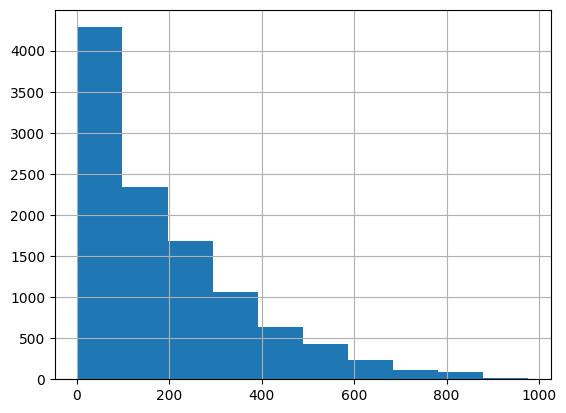

In [141]:
#[Q2]을 해결하기 위한 코드를 작성하세요
y.hist()

### [Q3] Y의 로그값 분포 시각화하기

(힌트) 히스토그램을 그려보세요.  
(힌트) 로그변환: numpy의 log1p() 함수


<Axes: >

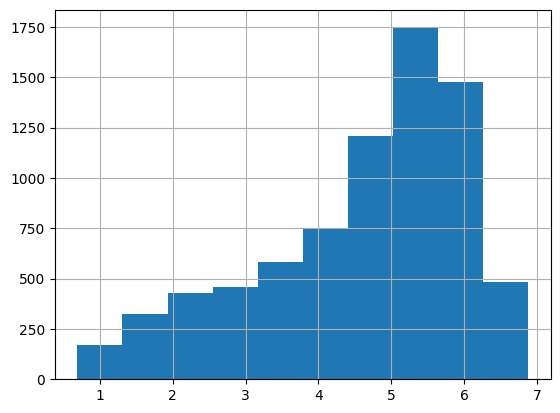

In [154]:
y_log = np.log1p(y_train)
y_log.hist()

### [Q4] Y의 로그값을 사용하여 모델 만들어보기

* 모델 학습, 예측, 평가는 get_model_predict()를 이용하세요.

In [143]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        # 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
        y_test = np.expm1(y_test)
        # 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    rmsle(y_test, pred)

In [144]:
#[Q4]을 해결하기 위한 코드를 작성하세요
get_model_predict(model,x_train, x_test,y_train,y_test)

### LinearRegression ###
RMSLE: 1.1602


### [Q5] 선형회귀모델에서 가장 영향을 많으 주는 종속변수 알아보기
아래 함수를 실행시키세요

In [101]:
def plotFeatureList(model, X):
    coef = pd.Series(model.coef_, index=X.columns)
    coef_sort = coef.sort_values(ascending=False)
    sns.barplot(x=coef_sort.values, y=coef_sort.index)

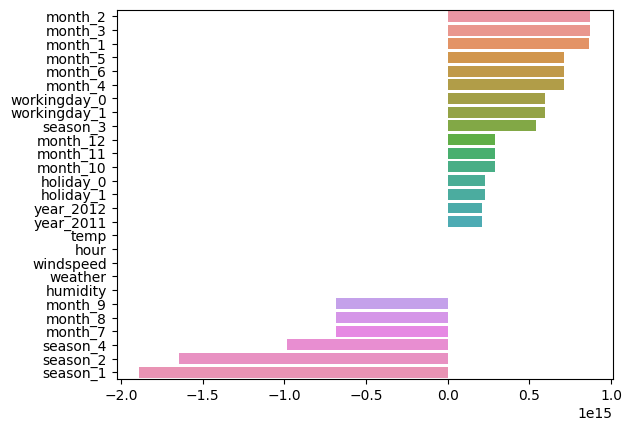

In [145]:
#[Q5]을 해결하기 위한 코드를 작성하세요
plotFeatureList(model,X)


### [Q6] 수치형 데이터 중 카테고리형 데이터 One Hot Encoding 하기

In [ ]:
#[Q6]을 해결하기 위한 코드를 작성하세요
위 소스 참조

### [Q7] One Hot Encoding 적용된 feature 데이터 세트 기반으로 학습/예측 

 * 데이터 분할
 * 학습: LinearRegression, RandomForestRegressor, GradientBoostingRegressor, XGBRegressor, LGBMRegressor
 * 예측
 * 평가

In [146]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [155]:
#[Q7]을 해결하기 위한 코드를 작성하세요
X_train, X_test, y_train, y_test = train_test_split(x_train, y_log, test_size=0.3, random_state=0)

# LinearRegression, 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=500)
gbm_model = GradientBoostingRegressor(n_estimators=500)
xgb_model = XGBRegressor(n_estimators=500)
lgbm_model = LGBMRegressor(n_estimators=500)

model_list = [lr_model, rf_model, gbm_model, xgb_model, lgbm_model]
for model in model_list:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)
    

### LinearRegression ###
RMSLE: 1.0177
### RandomForestRegressor ###
RMSLE: 0.3349
### GradientBoostingRegressor ###
RMSLE: 0.3271
### XGBRegressor ###
RMSLE: 0.3410
### LGBMRegressor ###
RMSLE: 0.3199


In [153]:
x_train.shape
y_log.shape

(10886,)

In [157]:
y_pred = lgbm_model.predict(X_test)